In [1]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [26]:
data=pd.read_csv("result_interaction_atf.csv")
interaction_array=np.array(data['Interaction'])
interaction_with_array=np.array(data['Interact_with'])
coordsx_array=np.array(data['x'])
coordsy_array=np.array(data['y'])

In [27]:
data2=data.loc[:,['x','y']]

In [28]:
data

,Id,x,y,Expression,Action,Gesture,Interaction,Interact_with
0,person1,182,80,Neutral,Sitting,Down,reading,book
1,person1,176,81,Neutral,Sitting,Down,reading,book
2,person1,174,82,Neutral,Sitting,Down,reading,book
3,person1,174,83,Neutral,Sitting,Down,reading,book
4,person1,173,84,Neutral,Sitting,Down,reading,book
...,...,...,...,...,...,...,...,...
151,person1,548,547,None,Sitting,Down,calling,phone
152,person1,558,543,None,Walking,Down,calling,phone
153,person1,556,555,None,Walking,Down,calling,phone
154,person1,549,548,None,Walking,Down,calling,phone


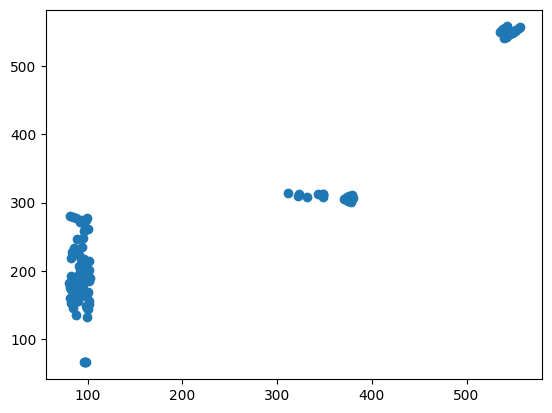

In [90]:
plt.scatter(data2.loc[:, ['y']], data2.loc[:, ['x']])

In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
label = km.fit_predict(data2[:])

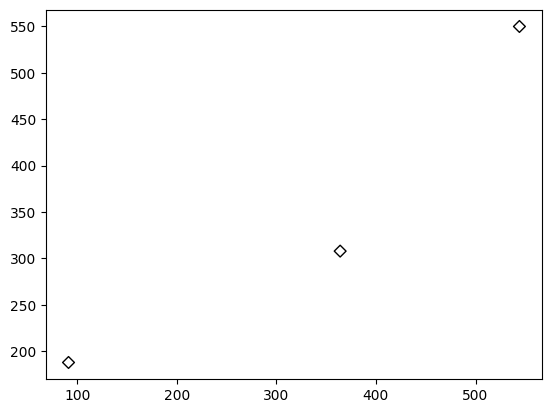

In [69]:
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], marker="D",
            facecolors='none', edgecolors='black')


In [74]:
import math
math.floor(centers[0][0])

307

Text(364.1000000000001, 307.8333333333333, '1')

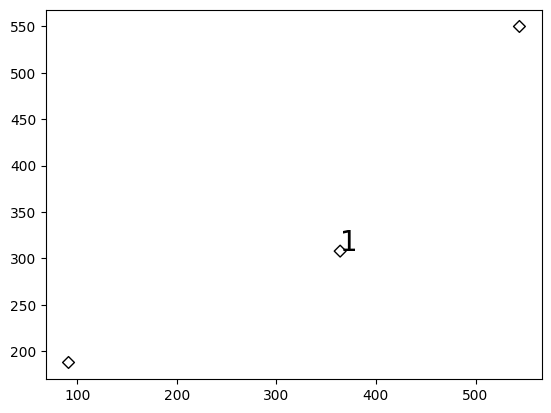

In [86]:
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], marker="D",
            facecolors='none', edgecolors='black')

plt.text(centers[0][1], centers[0][0], "1", fontsize=20)

In [57]:
data2

,x,y
0,182,80
1,176,81
2,174,82
3,174,83
4,173,84
...,...,...
151,548,547
152,558,543
153,556,555
154,549,548


In [31]:
data2.loc[:,['x']]

,x
0,182
1,176
2,174
3,174
4,173
...,...
151,548
152,558
153,556
154,549


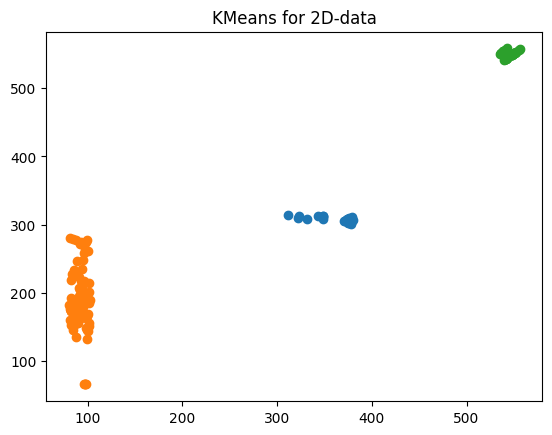

In [32]:
plt.scatter(data2.loc[:, ['y']][label==0], data2.loc[:, ['x']][label==0])
plt.scatter(data2.loc[:, ['y']][label==1], data2.loc[:, ['x']][label==1])
plt.scatter(data2.loc[:, ['y']][label==2], data2.loc[:, ['x']][label==2])
plt.title("KMeans for 2D-data")
plt.savefig("plot.png")
plt.show()

In [33]:
dd=data2.loc[:, ['y']][label==0]

In [34]:
type(dd)

pandas.core.frame.DataFrame

In [35]:
ddList = dd["y"].index.to_list()

In [36]:
ddList

[86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115]

In [44]:
obsList =[]
for i in ddList:
    obsList.append(interaction_array[i])

In [45]:
for i in ddList:
    obsList.append(interaction_with_array[i])

In [40]:
from gensim.models import KeyedVectors
model_dir = 'wiki-news-300d-1M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

In [46]:
utilizationClassList =['work','relax','dining','read','aisle']
# obsList=['working','keyboard']
score=[]
for uclass in utilizationClassList:
    exitList=[]
    for oclass in obsList:
        print(f'{uclass}:{oclass} {model.similarity(uclass, oclass)}')
        exitList.append(model.similarity(uclass, oclass))
    score.append(np.mean(exitList))
print(score)

work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:working 0.6682043075561523
work:keyboard 0.3785247206687927
work:ke

In [20]:
from gensim.models import KeyedVectors
model_dir = 'wiki-news-300d-1M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

In [21]:
similar_list = model.most_similar('reading')
for similar_set in similar_list:
    print(str(similar_set[0])+ " : " + str(similar_set[1]))

writing : 0.7524136304855347
rereading : 0.6780260801315308
listening : 0.6761811971664429
re-reading : 0.6713933348655701
viewing : 0.6559251546859741
comprehension : 0.6479963064193726
seeing : 0.6444914937019348
watching : 0.6424548625946045
perusing : 0.6307175159454346
read : 0.6265081763267517


In [22]:
similar_list = model.most_similar('Reading')
for similar_set in similar_list:
    print(str(similar_set[0])+ " : " + str(similar_set[1]))

Tilehurst : 0.6373909115791321
Berkshire : 0.5987052917480469
Berks : 0.5936546325683594
Comprehension : 0.5836167335510254
Whiteknights : 0.5750548839569092
reading : 0.5740324258804321
Southcote : 0.5704406499862671
Wokingham : 0.5675620436668396
Writing : 0.5670808553695679
Wyomissing : 0.5666302442550659


In [6]:
import numpy as np


In [23]:
utilizationClassList =['work','relax','dining','read','aisle']
obsList=['working','keyboard']
score=[]
for uclass in utilizationClassList:
    exitList=[]
    for oclass in obsList:
        print(f'{uclass}:{oclass} {model.similarity(uclass, oclass)}')
        exitList.append(model.similarity(uclass, oclass))
    score.append(np.mean(exitList))
print(score)
#ここのスコアを観測クラスの数に応じて変化させる

# print(model.similarity('workspace', 'keyboard'))
# print(model.similarity('relax', 'cellphone'))
# print(model.similarity('dining', 'book'))

work:working 0.6682043075561523
work:keyboard 0.3785247206687927
relax:working 0.3584078848361969
relax:keyboard 0.22833183407783508
dining:working 0.39249739050865173
dining:keyboard 0.31231793761253357
read:working 0.35465922951698303
read:keyboard 0.21017998456954956
aisle:working 0.2026730328798294
aisle:keyboard 0.3111250698566437
[0.52336454, 0.29336986, 0.35240766, 0.28241962, 0.25689906]


In [87]:
max_value = max(score)
max_index = score.index(max_value)
print(max_index)

0


In [88]:
utilizationClassList[max_index]

'work'

Text(364.1000000000001, 307.8333333333333, 'work')

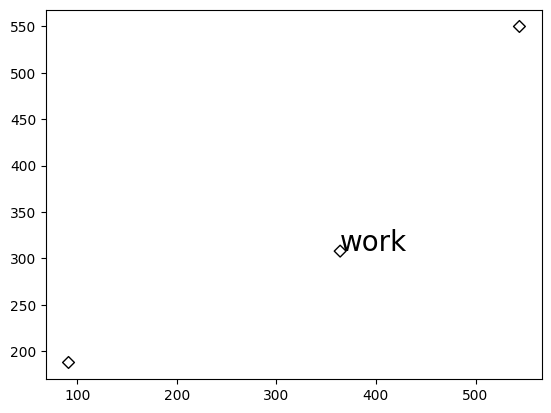

In [89]:
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], marker="D",
            facecolors='none', edgecolors='black')

plt.text(centers[0][1], centers[0][0], f"{utilizationClassList[max_index]}", fontsize=20)

In [24]:
utilizationClassList =['work','relax','dining','read','aisle']
obsList=['Working','Keyboard']
score=[]
for uclass in utilizationClassList:
    exitList=[]
    for oclass in obsList:
        print(f'{uclass}:{oclass} {model.similarity(uclass, oclass)}')
        exitList.append(model.similarity(uclass, oclass))
    score.append(np.mean(exitList))
print(score)
#ここのスコアを観測クラスの数に応じて変化させる

# print(model.similarity('workspace', 'keyboard'))
# print(model.similarity('relax', 'cellphone'))
# print(model.similarity('dining', 'book'))

work:Working 0.47837942838668823
work:Keyboard 0.20043474435806274
relax:Working 0.30106043815612793
relax:Keyboard 0.10247369110584259
dining:Working 0.2773248255252838
dining:Keyboard 0.2658868432044983
read:Working 0.2409876435995102
read:Keyboard 0.1144782230257988
aisle:Working 0.18492810428142548
aisle:Keyboard 0.17458005249500275
[0.3394071, 0.20176706, 0.27160585, 0.17773293, 0.17975408]


In [3]:
from gensim.models import KeyedVectors
model_dir = 'crawl-300d-2M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

/home/ozaki/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
